In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df_pk = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv')
df_pk

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
df_pk['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [4]:
df_pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
def drop_features(df):
    df.drop(columns=['#', 'Type 1', 'Type 2', 'Generation'], inplace=True)
    return df
df_pk = drop_features(df_pk)

In [6]:
df_pk

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,318,45,49,49,65,65,45,False
1,Ivysaur,405,60,62,63,80,80,60,False
2,Venusaur,525,80,82,83,100,100,80,False
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,False
4,Charmander,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...
795,Diancie,600,50,100,150,100,150,50,True
796,DiancieMega Diancie,700,50,160,110,160,110,110,True
797,HoopaHoopa Confined,600,80,110,60,150,130,70,True
798,HoopaHoopa Unbound,680,80,160,60,170,130,80,True


In [7]:
df_pk.set_index('Name', inplace=True)

In [8]:
df_pk

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Name,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,False
Ivysaur,405,60,62,63,80,80,60,False
Venusaur,525,80,82,83,100,100,80,False
VenusaurMega Venusaur,625,80,100,123,122,120,80,False
Charmander,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...
Diancie,600,50,100,150,100,150,50,True
DiancieMega Diancie,700,50,160,110,160,110,110,True
HoopaHoopa Confined,600,80,110,60,150,130,70,True


In [9]:
df_pk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Total      800 non-null    int64
 1   HP         800 non-null    int64
 2   Attack     800 non-null    int64
 3   Defense    800 non-null    int64
 4   Sp. Atk    800 non-null    int64
 5   Sp. Def    800 non-null    int64
 6   Speed      800 non-null    int64
 7   Legendary  800 non-null    bool 
dtypes: bool(1), int64(7)
memory usage: 50.8+ KB


In [10]:
df_pk.isna().value_counts()

Total  HP     Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
False  False  False   False    False    False    False  False        800
dtype: int64

In [11]:
df_pk.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Legendary'],
      dtype='object')

In [12]:
df_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state= 11)
svc_clf = SVC()
clf_list = [df_clf, rf_clf, svc_clf]

In [14]:
data = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [15]:
pd.get_dummies(df_pk)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Name,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,False
Ivysaur,405,60,62,63,80,80,60,False
Venusaur,525,80,82,83,100,100,80,False
VenusaurMega Venusaur,625,80,100,123,122,120,80,False
Charmander,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...
Diancie,600,50,100,150,100,150,50,True
DiancieMega Diancie,700,50,160,110,160,110,110,True
HoopaHoopa Confined,600,80,110,60,150,130,70,True


In [35]:
def exec_kfold(df, clf, k):
    acc_list = []
    kfold = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kfold.split(df[data])):
        X_train2,X_test2 = df[data].values[train_index], df[data].values[test_index]
        y_train2,y_test2 = df['Legendary'].values[train_index],df['Legendary'].values[test_index]
        
        clf.fit(X_train2, y_train2)
        pred2 = clf.predict(X_test2)
        acc = accuracy_score(y_test2, pred2)
        acc_list.append(acc)
        print(i , ': 교차검증 정확도>> {0:.2f}'.format(acc))
    print('평균 정확도>> {0:.2f}'.format(np.mean(acc_list)))
    return np.mean(acc_list)

In [36]:
exec_kfold(df_pk, df_clf, 5)

0 : 교차검증 정확도>> 0.93
1 : 교차검증 정확도>> 0.94
2 : 교차검증 정확도>> 0.91
3 : 교차검증 정확도>> 0.93
4 : 교차검증 정확도>> 0.89
평균 정확도>> 0.92


0.9175000000000001

In [37]:
acc_total = []
dt5 = []
dt10=[]
rf5 = []
rf10 = []
svc5 = []
svc10 = []

model_list = ['decision tree', 'random forest', 'svm']
for i, clf in enumerate(clf_list):
    for k in [5,10]:
        print(model_list[i], k, '----검증시작----')
        acc_result = exec_kfold(df_pk, clf, k)
        acc_total.append(acc_result)

decision tree 5 ----검증시작----
0 : 교차검증 정확도>> 0.93
1 : 교차검증 정확도>> 0.94
2 : 교차검증 정확도>> 0.91
3 : 교차검증 정확도>> 0.93
4 : 교차검증 정확도>> 0.89
평균 정확도>> 0.92
decision tree 10 ----검증시작----
0 : 교차검증 정확도>> 0.94
1 : 교차검증 정확도>> 0.94
2 : 교차검증 정확도>> 0.97
3 : 교차검증 정확도>> 0.93
4 : 교차검증 정확도>> 0.96
5 : 교차검증 정확도>> 0.90
6 : 교차검증 정확도>> 0.82
7 : 교차검증 정확도>> 1.00
8 : 교차검증 정확도>> 0.86
9 : 교차검증 정확도>> 0.90
평균 정확도>> 0.92
random forest 5 ----검증시작----
0 : 교차검증 정확도>> 0.96
1 : 교차검증 정확도>> 0.96
2 : 교차검증 정확도>> 0.93
3 : 교차검증 정확도>> 0.94
4 : 교차검증 정확도>> 0.90
평균 정확도>> 0.94
random forest 10 ----검증시작----
0 : 교차검증 정확도>> 0.96
1 : 교차검증 정확도>> 0.96
2 : 교차검증 정확도>> 0.99
3 : 교차검증 정확도>> 0.93
4 : 교차검증 정확도>> 1.00
5 : 교차검증 정확도>> 0.84
6 : 교차검증 정확도>> 0.88
7 : 교차검증 정확도>> 1.00
8 : 교차검증 정확도>> 0.88
9 : 교차검증 정확도>> 0.93
평균 정확도>> 0.94
svm 5 ----검증시작----
0 : 교차검증 정확도>> 0.96
1 : 교차검증 정확도>> 0.97
2 : 교차검증 정확도>> 0.93
3 : 교차검증 정확도>> 0.94
4 : 교차검증 정확도>> 0.89
평균 정확도>> 0.94
svm 10 ----검증시작----
0 : 교차검증 정확도>> 0.95
1 : 교차검증 정확도>> 0.96
2 : 교차검증 정확도>> 0.99
3 : 교차검증 정확도>

In [38]:
acc_total

[0.9175000000000001,
 0.9225000000000001,
 0.93625,
 0.9350000000000002,
 0.9375,
 0.9337500000000001]

In [39]:
acc_total5 = []
acc_total10 = []
for i, k in enumerate(acc_total):
    if i in [0,2,4]:
        acc_total5.append(k)
    else:
        acc_total10.append(k)
print(acc_total5)
acc_total10

[0.9175000000000001, 0.93625, 0.9375]


[0.9225000000000001, 0.9350000000000002, 0.9337500000000001]

In [40]:
for i in range(3):
    for k, x in enumerate([5,10]):
        print(model_list[i], x, " 교차검증 평균: ", acc_total[(2*i)+k])

decision tree 5  교차검증 평균:  0.9175000000000001
decision tree 10  교차검증 평균:  0.9225000000000001
random forest 5  교차검증 평균:  0.93625
random forest 10  교차검증 평균:  0.9350000000000002
svm 5  교차검증 평균:  0.9375
svm 10  교차검증 평균:  0.9337500000000001


In [41]:
# 최대 평균값 ==
max_value = np.max(acc_total)
# 최대 평균값 인덱스 ==
max_index = np.argmax(acc_total)
# 최대 평균값 모델명 ==
max_model = model_list[max_index//2]

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model)

최고 교차 검증 평균>>  0.9375
최고 교차 검증 인덱스>>  4
최고 교차 검증 모델링>>  svm


In [42]:
imp_clf= df_clf.feature_importances_

In [43]:
imp_rf = rf_clf.feature_importances_

<BarContainer object of 6 artists>

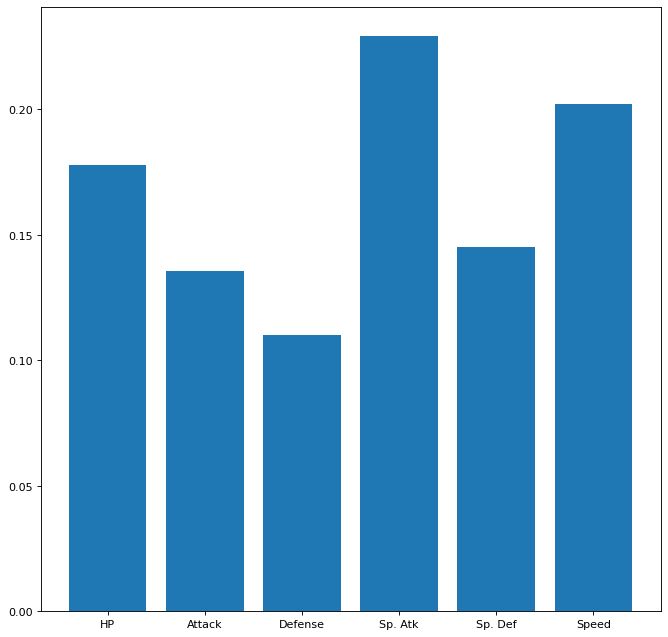

In [44]:
plt.figure(figsize=(10, 10), dpi=80)
plt.bar(df_pk[data].columns, rf_clf.feature_importances_)

<BarContainer object of 6 artists>

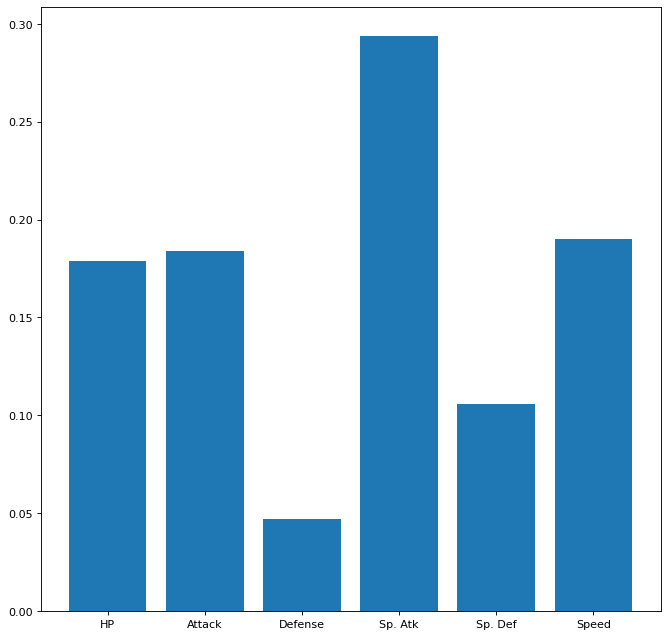

In [45]:
plt.figure(figsize=(10, 10), dpi=80)
plt.bar(df_pk[data].columns, df_clf.feature_importances_)

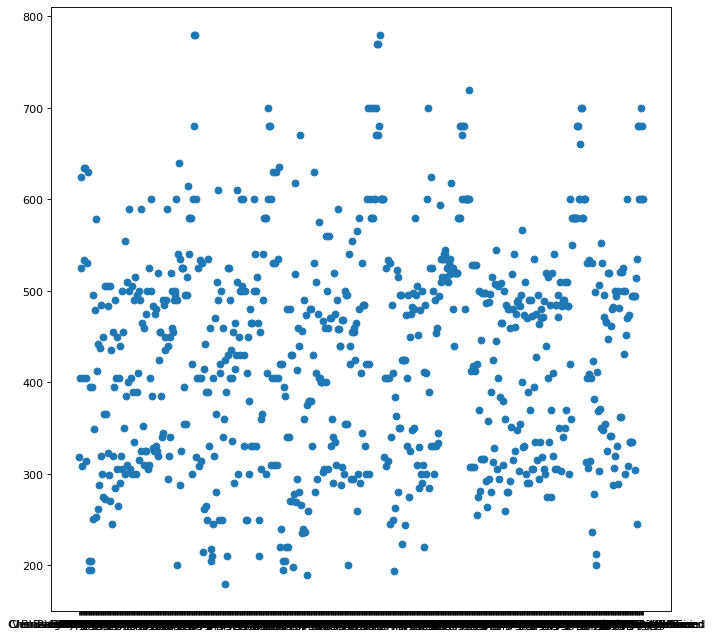

In [46]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(df_pk.index, df_pk['Total'])
plt.show()

In [47]:
df_pk.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Legendary'],
      dtype='object')

In [92]:
y = df_pk['Legendary']
X = df_pk.iloc[:, :2]
y

Name
Bulbasaur                False
Ivysaur                  False
Venusaur                 False
VenusaurMega Venusaur    False
Charmander               False
                         ...  
Diancie                   True
DiancieMega Diancie       True
HoopaHoopa Confined       True
HoopaHoopa Unbound        True
Volcanion                 True
Name: Legendary, Length: 800, dtype: bool

In [81]:
X

,Total,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,
Bulbasaur,318,318,45,49,49,65,65,45
Ivysaur,405,405,60,62,63,80,80,60
Venusaur,525,525,80,82,83,100,100,80
VenusaurMega Venusaur,625,625,80,100,123,122,120,80
Charmander,309,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
Diancie,600,600,50,100,150,100,150,50
DiancieMega Diancie,700,700,50,160,110,160,110,110
HoopaHoopa Confined,600,600,80,110,60,150,130,70


In [93]:
from sklearn import svm, datasets
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C, ).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.2, C=C).fit(X, y)


In [94]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)


In [95]:
lin_svc = svm.LinearSVC(C=C, dual=True).fit(X, y)

C:\Users\hi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [96]:
X

,Total,HP
Name,,
Bulbasaur,318,45
Ivysaur,405,60
Venusaur,525,80
VenusaurMega Venusaur,625,80
Charmander,309,39
...,...,...
Diancie,600,50
DiancieMega Diancie,700,50
HoopaHoopa Confined,600,80


In [97]:
X.iloc[:, 0]

Name
Bulbasaur                318
Ivysaur                  405
Venusaur                 525
VenusaurMega Venusaur    625
Charmander               309
                        ... 
Diancie                  600
DiancieMega Diancie      700
HoopaHoopa Confined      600
HoopaHoopa Unbound       680
Volcanion                600
Name: Total, Length: 800, dtype: int64

In [98]:
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


C:\Users\hi\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


MemoryError: We've run out of memory

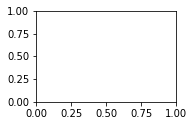

In [99]:
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [120]:
col1 = [1, 2, 3, 4, np.inf]
col2 = ['one', 'two', 'three', '', np.NaN]
col3 = [1.5, 2.5, 3.5, 4.5, 5.5]
col4 = [True, False, False, True, True]
df = pd.DataFrame({"col1": col1, "col2": col2, "col3": col3, "col4": col4})


In [123]:
type(df.asof(where=45))

pandas.core.series.Series

In [129]:
np.random.rand(4,2)

array([[0.78816507, 0.59863147],
       [0.6690157 , 0.50727146],
       [0.25659117, 0.42356021],
       [0.88611802, 0.67158125]])

In [132]:
df = pd.DataFrame(np.random.rand(4,2), 
                  index = [['a','a','b','b'], [1,2,3,4,]], 
                  columns = ['no1', 'no2'])
df

no1       no2
a 1  0.156694  0.705055
  2  0.528552  0.357363
b 3  0.592339  0.026403
  4  0.792422  0.646678

In [142]:
df['no3']= df['no1']+df['no2']
df

no1       no2       no3
a 1  0.156694  0.705055  0.861748
  2  0.528552  0.357363  0.885915
b 3  0.592339  0.026403  0.618741
  4  0.792422  0.646678  1.439101

In [144]:
df.drop(columns=['no1', 'no2'])

no3
a 1  0.861748
  2  0.885915
b 3  0.618741
  4  1.439101

In [141]:
df.sum(axis=1)

a  1    0.861748
   2    0.885915
b  3    0.618741
   4    1.439101
dtype: float64

In [145]:
df

no1       no2       no3
a 1  0.156694  0.705055  0.861748
  2  0.528552  0.357363  0.885915
b 3  0.592339  0.026403  0.618741
  4  0.792422  0.646678  1.439101

In [ ]:
df.applymap(sum